# KMean

---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

L'algorithme du KMean consiste à :
- Choisir k centroïdes aléatoirement
- Calculer les distances avec les k-centroïdes pour chaque point du dataset
- Assigner chaque point au centroïde le plus proche
- Actualiser les centroïdes comme centre des nouveaux cluster obtenus
- Répéter les opérations précédentes jusqu'à ce que les centroïdes convergent

## Distance Euclidienne

Distance entre deux vecteurs à 2 dimensions : 

$$ d(X,Y) = \sqrt{(X_{A} - X_{B})^2 + (Y_{A} - Y_{B})^2} $$

Distance entre deux vecteurs à $n$ dimensions : 

$$ d(X,Y) = \sqrt{\sum_{i=0}^{n}{(x_i - y_i)^2}} $$

## Dataset : Iris

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
y = iris.target
X = iris.data

In [6]:
data = X[:,2:4]

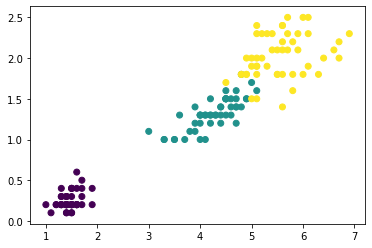

In [7]:
plt.scatter(X[:,2], X[:,3], c=y);

---

## KMean : Sklearn

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3)
model.fit(data)
predict = model.labels_

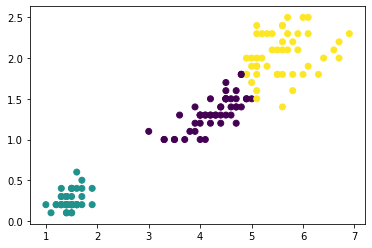

In [19]:
plt.scatter(data[:,0], data[:,1], c=predict);

### Comment choisir le nombre de cluster ?


$$distortion = \frac{\sum\limits_{i}^{n} \textit{cdist}(x_i, c_i)}{\textit{n}}$$

- $x_i$ : correspond à l'observation $i$
- $c_i$ : correspond au centroïde correspondant à $x_i$
- $n$ : correspond au nombre d'observations

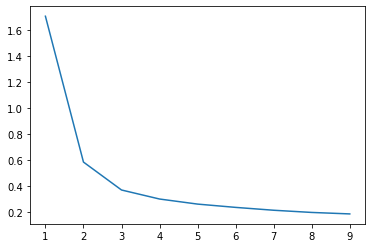

In [35]:
from scipy.spatial.distance import cdist

list_k = list(range(1,10))
inertia = []
distortions = []

for i in list_k:
    kmean = KMeans(n_clusters=i).fit(data)
    inertia.append(kmean.inertia_)
    centroid.append(kmean.cluster_centers_)
    distortions.append(sum(np.min(cdist(data, kmean.cluster_centers_, 
                                        'euclidean'), 
                                  axis=1)) / np.size(data, axis = 0))

#plt.plot(list_k, inertia)
plt.plot(list_k, distortions);

## KMean : implémentation

### Cas simple : deux clusters

In [11]:
def KMean_two(X, n_iter=10):
    
    # Initialise les centroids
    centroid_1 = np.random.rand(2,1)
    centroid_2 = np.random.rand(2,1)

    for it in range(n_iter): 
        
        # Initialise un tableau de zeros
        dist = np.zeros((X.shape[0],2))
        
        # 
        for j,i in enumerate(X) : 
            dist[j,0] = euclidean(i, centroid_1)
            dist[j,1] = euclidean(i, centroid_2)

        label = np.argmin(dist, axis=1)

        if np.any(label == 1) and np.any(label == 0):
            centroid_1 = X[label == 0].mean(axis=0)
            centroid_2 = X[label == 1].mean(axis=0)
        elif np.any(label == 1):
            centroid_2 = X[label == 1].mean(axis=0)
        elif np.any(label == 0):
            centroid_1 = X[label == 0].mean(axis=0)
    
    centers = np.vstack([centroid_1, centroid_2])
    
    return label, centers

In [12]:
labels, center = KMean_two(data)

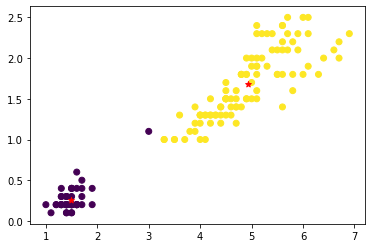

In [15]:
plt.scatter(data[:,0], data[:,1], c=labels, marker='o')
plt.scatter(center[0,0],center[0,1], c='r', marker='*')
plt.scatter(center[1,0],center[1,1], c='r', marker='*');

### Cas global : n clusters

In [44]:
def KMean(data, n_clusters, max_iterations=10, random_state=None):
    
    """
    Algorithme de Clustering : KMean
    
    Parametres 
    ------------
    data : une matrice de données 
    n_cluster : nombre de centroids
    max_iteration : nombre d'itération
    
    Retour 
    -----------
    centers : coordonées des centroids finaux
    label_data : données d'entrées avec labels
    
    """
    # Seed des centroids
    np.random.seed(random_state)
    
    # Initialise les centroids selon n_clusters et les 
    # dimensions de la matrice (nombre de variables)
    
    #centers = np.random.rand(n_clusters, data.shape[1])
    index = np.random.randint(data.shape[0], size=(n_clusters,1)).ravel()
    centers = [data[ex] for ex in index]
    
    for K in range(max_iterations):
        
        # Calcule pour chaque vecteur son centroid le plus proche
        # et renvoie son label
        vectors_to_centers = np.array([
            np.argmin([euclidean(vector, c) for c in centers])
            for vector in data
        ])
        
        # Met à jour les centres associés à des données
        for i in range(n_clusters):
            
            # Trouve les index des centroids
            vector_indexes = np.where(vectors_to_centers == i)
            
            # Applique les index aux données
            vectors = data[vector_indexes]
            
            # Calcule la moyenne du nouveau vecteur
            # et remplace l'ancien centroid
            centers[i] = np.mean(vectors, axis=0)

        
        
        # Concatène les données d'entrées et les labels trouvés
        label_data = np.concatenate([data, 
                                     np.array(vectors_to_centers).reshape(data.shape[0],1)], 
                                    axis=1)
            
    return label_data, centers

In [45]:
data, centers = KMean(data, n_clusters=3, max_iterations=10, random_state=3)

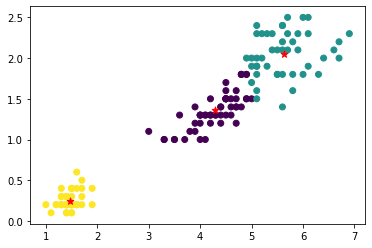

In [48]:
plt.scatter(label[:,0], label[:,1], c=label[:,-1]);

for i in centers : 
    plt.scatter(i[0], i[1], c='r', marker='*', s=50);
